In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

import scipy.io as sio
import pandas as pd

# Scrapping meta data of test and train data from the .mat files

In [2]:
cars_annos = sio.loadmat('../input/standford-cars-dataset-meta/cars_test_annos_withlabels (1).mat')
annotations = cars_annos['annotations']
annotations = np.transpose(annotations)

fnames = []
bboxes = []

for annotation in annotations:
    bbox_x1 = annotation[0][0][0][0]
    bbox_y1 = annotation[0][1][0][0]
    bbox_x2 = annotation[0][2][0][0]
    bbox_y2 = annotation[0][3][0][0]
    fname = annotation[0][5][0]
    car_class = annotation[0][4][0]
    bboxes.append((fname,bbox_x1, bbox_x2, bbox_y1, bbox_y2, int(list(car_class)[0])))
    
    
test_meta = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2','car_class'])

test_meta

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,00001.jpg,30,246,52,147,181
1,00002.jpg,100,576,19,203,103
2,00003.jpg,51,968,105,659,145
3,00004.jpg,67,581,84,407,187
4,00005.jpg,140,593,151,339,185
...,...,...,...,...,...,...
8036,08037.jpg,49,1169,57,669,63
8037,08038.jpg,23,640,18,459,16
8038,08039.jpg,33,602,27,252,17
8039,08040.jpg,33,521,142,376,38


In [3]:
cars_annos = sio.loadmat('../input/standford-cars-dataset-meta/devkit/cars_train_annos.mat')
annotations = cars_annos['annotations']
annotations = np.transpose(annotations)

fnames = []
bboxes = []

for annotation in annotations:
    bbox_x1 = annotation[0][0][0][0]
    bbox_y1 = annotation[0][1][0][0]
    bbox_x2 = annotation[0][2][0][0]
    bbox_y2 = annotation[0][3][0][0]
    fname = annotation[0][5][0]
    car_class = annotation[0][4][0]
    bboxes.append((fname,bbox_x1, bbox_x2, bbox_y1, bbox_y2, int(list(car_class)[0])))
    
    
train_meta = pd.DataFrame(bboxes, columns = ['fnames','bbox_x1', 'bbox_x2', 'bbox_y1', 'bbox_y2','car_class'])

train_meta.head()

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,00001.jpg,39,569,116,375,14
1,00002.jpg,36,868,116,587,3
2,00003.jpg,85,601,109,381,91
3,00004.jpg,621,1484,393,1096,134
4,00005.jpg,14,133,36,99,106


# Cropping images 

In [4]:
from PIL import Image

In [5]:
os.mkdir('/kaggle/working/training/')
os.mkdir('/kaggle/working/testing/')

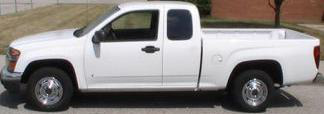

In [6]:

for i in range(0,len(train_meta)):
    
    img_path = "../input/stanford-cars-dataset/cars_train/cars_train/"+train_meta.fnames[i]
    
    left = train_meta.bbox_x1[i]
    top = train_meta.bbox_y1[i]
    right = train_meta.bbox_x2[i]
    bottom = train_meta.bbox_y2[i]
    
    img= Image.open(img_path)
    img = img.crop((left, top, right, bottom))
    img_output = "./training" + train_meta.fnames[i]
    img.save(img_output)

img_output = "./training" + test_meta.fnames[4573]
Image.open(img_output)

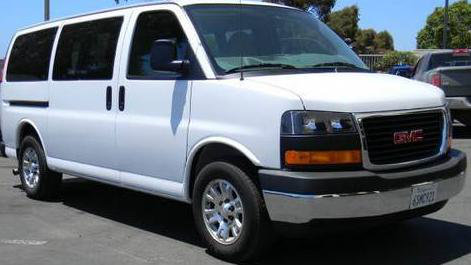

In [7]:
for i in range(0,len(test_meta)):
    
    img_path = "../input/stanford-cars-dataset/cars_test/cars_test/"+test_meta.fnames[i]
    
    left = test_meta.bbox_x1[i]
    top = test_meta.bbox_y1[i]
    right = test_meta.bbox_x2[i]
    bottom = test_meta.bbox_y2[i]
    
    img= Image.open(img_path)
    img = img.crop((left, top, right, bottom))
    img_output = "./testing" + test_meta.fnames[i]
    img.save(img_output)
    
img_output = "./testing" + test_meta.fnames[4573]
Image.open(img_output)

# A picture before cropping

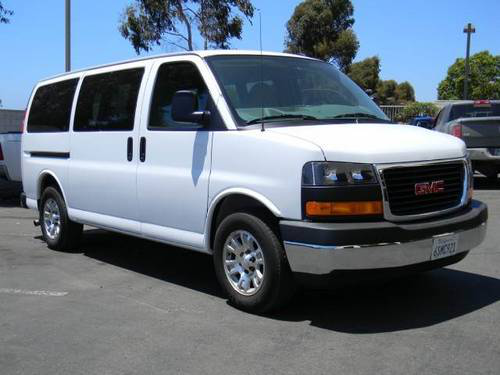

In [8]:
Image.open("../input/stanford-cars-dataset/cars_test/cars_test/"+test_meta.fnames[4573])

# AI model starts from here

In [9]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import glob
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
import keras

In [10]:
train_meta = train_meta.astype({"car_class": str}, errors='raise')
test_meta = test_meta.astype({"car_class": str}, errors='raise') 

In [11]:
train_meta.head()

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,00001.jpg,39,569,116,375,14
1,00002.jpg,36,868,116,587,3
2,00003.jpg,85,601,109,381,91
3,00004.jpg,621,1484,393,1096,134
4,00005.jpg,14,133,36,99,106


In [12]:
train_meta['fnames'] = "training" + train_meta["fnames"]
train_meta.head(3)

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,training00001.jpg,39,569,116,375,14
1,training00002.jpg,36,868,116,587,3
2,training00003.jpg,85,601,109,381,91


In [13]:
test_meta['fnames'] = "testing" + test_meta["fnames"]
test_meta.head(3)

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,testing00001.jpg,30,246,52,147,181
1,testing00002.jpg,100,576,19,203,103
2,testing00003.jpg,51,968,105,659,145


In [14]:
train_meta

,fnames,bbox_x1,bbox_x2,bbox_y1,bbox_y2,car_class
0,training00001.jpg,39,569,116,375,14
1,training00002.jpg,36,868,116,587,3
2,training00003.jpg,85,601,109,381,91
3,training00004.jpg,621,1484,393,1096,134
4,training00005.jpg,14,133,36,99,106
...,...,...,...,...,...,...
8139,training08140.jpg,3,423,44,336,78
8140,training08141.jpg,138,706,150,523,196
8141,training08142.jpg,26,660,246,449,163
8142,training08143.jpg,78,1489,526,908,112


In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

training_set = train_datagen.flow_from_dataframe(
dataframe= train_meta,
directory= "./",
x_col= 'fnames',
y_col='car_class')

Found 8144 validated image filenames belonging to 196 classes.


In [16]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)

test_set = train_datagen.flow_from_dataframe(
dataframe= test_meta,
directory= "./",
x_col= 'fnames',
y_col='car_class')

Found 8041 validated image filenames belonging to 196 classes.


In [17]:
model = Sequential()

model.add(Conv2D(255, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(255, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(255, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(196,activation='softmax'))

model.summary()

2022-05-20 10:45:33.654387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 10:45:33.764310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 10:45:33.765034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 10:45:33.766700: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 255)     7140      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 255)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 255)     585480    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 255)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 255)       585480    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 255)       0         
_________________________________________________________________
flatten (Flatten)            (None, 229500)            0

In [18]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [19]:
model.fit(x = training_set , validation_data = test_set , epochs = 100)

2022-05-20 10:45:36.660962: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-05-20 10:45:38.249565: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


255/255 [==============================] - 112s 404ms/step - loss: 5.9436 - accuracy: 0.0070 - val_loss: 5.2651 - val_accuracy: 0.0088
Epoch 2/100
255/255 [==============================] - 99s 389ms/step - loss: 5.2428 - accuracy: 0.0097 - val_loss: 5.1738 - val_accuracy: 0.0117
Epoch 3/100
255/255 [==============================] - 99s 390ms/step - loss: 5.1716 - accuracy: 0.0160 - val_loss: 5.0954 - val_accuracy: 0.0183
Epoch 4/100
255/255 [==============================] - 102s 402ms/step - loss: 5.0645 - accuracy: 0.0215 - val_loss: 4.8850 - val_accuracy: 0.0368
Epoch 5/100
255/255 [==============================] - 101s 395ms/step - loss: 4.8385 - accuracy: 0.0354 - val_loss: 4.7200 - val_accuracy: 0.0497
Epoch 6/100
255/255 [==============================] - 100s 391ms/step - loss: 4.5697 - accuracy: 0.0613 - val_loss: 4.4652 - val_accuracy: 0.0764
Epoch 7/100
255/255 [==============================] - 100s 394ms/step - loss: 4.2157 - accuracy: 0.0979 - val_loss: 4.1954 - val_ac